# ML-Labwork

In [29]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

scaler = MinMaxScaler()

df = pd.read_csv('/Users/wenghong/PycharmProjects/ML-labwork/House Pricing.csv')

num_nan_rows = df.isnull().sum(axis=1).astype(bool).sum()
total_rows = df.shape[0]

print('Number of N/A rows: {}'.format(num_nan_rows))
print('Number of total rows: {}'.format(total_rows))

df.dropna() #remove N/A values
print('Number of records after removing N/A values: {}'.format(df.shape[0]))

Number of N/A rows: 0
Number of total rows: 545
Number of records after removing N/A values: 545


## Show available columns in the dataset and list the variety of values for each column

In [30]:
print(df.columns)

for col in df.columns:
    print('{}\n'.format(col), df[col].unique())

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
price
 [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5

## Convert Non-Numerical values to numerical accordingly

In [31]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'furnished': 1, 'semi-furnished': 2})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


## Remove outliers from dataset

In [32]:


#remove outliers
z_scores = np.abs(stats.zscore(df))
min_threshold = 2.5
max_threshold = 3
print('Number of rows after removing outliers using 2.5 std dev: {}'.format(df[(z_scores < min_threshold).all(axis=1)].shape[0]))
print('Number of rows after removing outliers using 3 std dev: {}'.format(df[(z_scores < max_threshold).all(axis=1)].shape[0]))
print('Number of rows that are within std dev 2.5 to 3: {}'.format(abs(df[(z_scores < min_threshold).all(axis=1)].shape[0]- df[(z_scores < max_threshold).all(axis=1)].shape[0])))

df = df[(z_scores < min_threshold).all(axis=1)]
print(df.shape[0])

Number of rows after removing outliers using 2.5 std dev: 438
Number of rows after removing outliers using 3 std dev: 499
Number of rows that are within std dev 2.5 to 3: 61
438


## Normalize values by rescaling it to range of [0,1]

In [33]:
df['id'] = [i for i in range(len(df))]
id = df.pop('id')
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized = pd.concat([df_normalized, id.reset_index(drop=True)], axis=1)
# df_normalized.head()
last_col = df_normalized.pop(df_normalized.columns[-1])
df_normalized.insert(0, last_col.name, last_col)
df_normalized.head(20)


,id,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,1.000000,0.553672,1.0,1.0,0.5,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0
1,1,0.990741,0.694915,0.5,1.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,0.972222,0.491525,1.0,0.0,0.5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,3,0.972222,0.559322,1.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0,0.5,1.0,0.0
4,4,0.944444,0.333333,0.5,1.0,0.5,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5
5,5,0.939815,0.538983,0.5,1.0,0.5,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0
6,6,0.916667,0.622034,0.5,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7,7,0.912037,0.723164,0.5,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.5,0.0,0.5
8,8,0.912037,0.328814,0.5,1.0,0.5,1.0,1.0,1.0,0.0,1.0,0.5,0.0,0.5
9,9,0.902778,0.807910,0.5,1.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5


## Implement linear regression into training model
Train the regression model on the training dataset. This will involve fitting the model to the training dataset by adjusting the model parameters to minimize the difference between the predicted and actual house prices.

In [34]:
#Spliting the dataset to testing dataset and training dataset in 0.2:0.8 ratio
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop("price", axis=1), df_normalized["price"], test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)



## Model Evaluation
Visualize the performance of model using various evaluation metrics such as `Mean Squared Error (MSE)`, `Root Mean Squared Error (MSE)`, and `coefficient of determination (R^2)`. Visualize the results by plotting the predicted vs actual house prices.

Mean Squared Error: 0.003399730768663032
R-squared: 0.9254592748144654


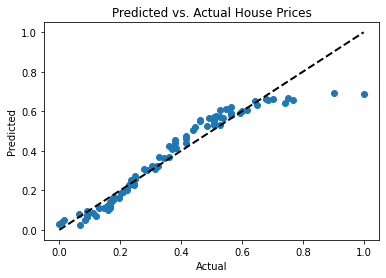

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot predicted vs. actual house prices
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices')
plt.show()